# Problem Statement:

Attribute information For bank dataset

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'bank-full.csv',sep = ';')

# Data Exploration

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7923,31,blue-collar,married,secondary,no,1533,yes,no,unknown,30,may,29,4,-1,0,unknown,no
30803,22,student,single,secondary,no,0,no,no,cellular,6,feb,229,6,-1,0,unknown,yes
17261,50,technician,married,secondary,no,2972,no,no,cellular,28,jul,73,5,-1,0,unknown,no
5957,43,admin.,married,secondary,yes,-204,yes,no,unknown,26,may,163,2,-1,0,unknown,no
35824,42,admin.,married,secondary,no,3279,yes,no,cellular,8,may,261,1,344,1,failure,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df[df.duplicated()].shape

(0, 17)

In [10]:
df.corr()

C:\Users\vijay\AppData\Local\Temp\ipykernel_3220\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


C:\Users\vijay\AppData\Local\Temp\ipykernel_3220\3359214350.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


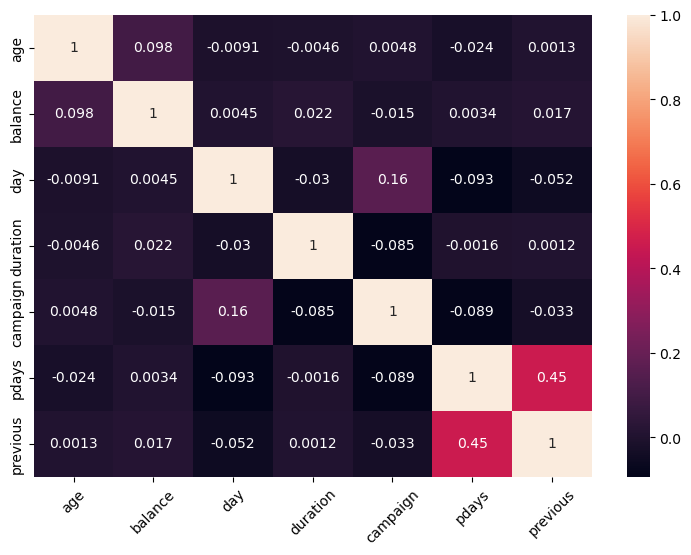

In [11]:
fig = plt.figure(figsize= (9,6))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45);

In [12]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

<Axes: xlabel='y', ylabel='count'>

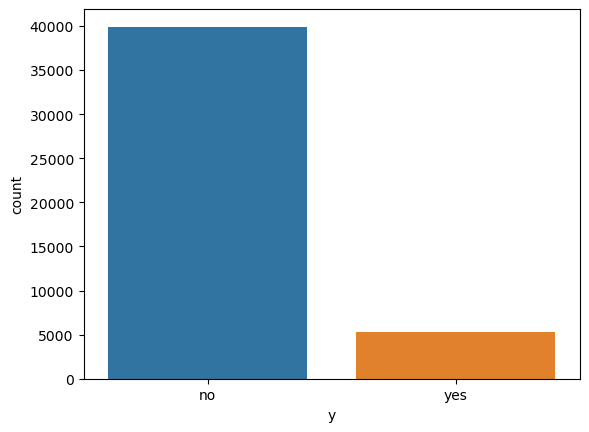

In [13]:
sns.countplot(data=df, x='y')

In [14]:
# # Converting to numeric
# df ['default'] = df ['default'].map({'yes': 1, 'no': 0})
# df ['housing'] = df ['housing'].map({'yes': 1, 'no': 0})
# df ['loan'] = df ['loan'].map({'yes': 1, 'no': 0})
# df ['y'] = df ['y'].map({'yes': 1, 'no': 0})

In [15]:
my_object_df = df.select_dtypes(include='object')

In [16]:
my_numeric_df = df.select_dtypes(exclude='object')

In [17]:
my_numeric_df

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [18]:
my_object_df

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [19]:
df_objects_dummies = pd.get_dummies(my_object_df, drop_first = True)

In [20]:
df_objects_dummies

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
45207,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [21]:
finaldf = pd.concat([my_numeric_df,df_objects_dummies],axis=1)

In [22]:
finaldf

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
finaldf.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')

# Data Splitting

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# CODE HERE
X = finaldf.drop('y_yes',axis=1)
y = finaldf['y_yes']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
scaled_X_train = scaler.fit_transform(X_train)

In [30]:
scaled_X_test = scaler.transform(X_test)

# Model Selection

In [31]:
from sklearn.linear_model import LogisticRegressionCV

In [32]:
log_model = LogisticRegressionCV()

In [33]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [34]:
log_model.C_

array([0.04641589])

In [35]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [36]:
log_model.coef_

array([[ 0.00260097,  0.03683644,  0.09872576,  1.04259921, -0.268217  ,
         0.01413625,  0.021678  , -0.11139594, -0.05117752, -0.09459199,
        -0.04737643,  0.06661005, -0.03066432, -0.05645061,  0.04899074,
        -0.06003601, -0.03318845, -0.02795645, -0.06609416,  0.05380043,
         0.08533226,  0.16931816,  0.04410494, -0.00755277, -0.34479534,
        -0.13318358, -0.04151837, -0.71510871, -0.22552339,  0.04154595,
        -0.02815406, -0.21431953, -0.28443798,  0.13889399,  0.16527086,
        -0.18618308, -0.24728724,  0.09846598,  0.07982205,  0.0297872 ,
         0.39719401, -0.05184732]])

# Model Evaluation

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [38]:
y_pred = log_model.predict(scaled_X_test)

In [39]:
confusion_matrix(y_test, y_pred)

array([[11694,   273],
       [ 1015,   582]], dtype=int64)

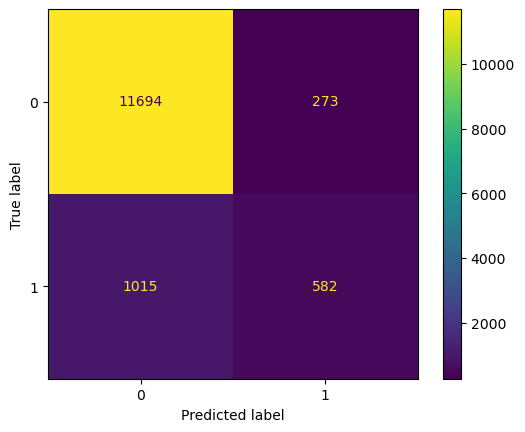

In [40]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=log_model.classes_).plot();

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11967
           1       0.68      0.36      0.47      1597

    accuracy                           0.91     13564
   macro avg       0.80      0.67      0.71     13564
weighted avg       0.89      0.91      0.89     13564

